# ReACT with Interact + Baryons 

In [1]:
import numpy as np
import camb

%matplotlib inline
import matplotlib.pyplot as plt

import pyreact
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


font = {'color':  'blue',
        'weight': 'normal',
        'size': 20,
        }

!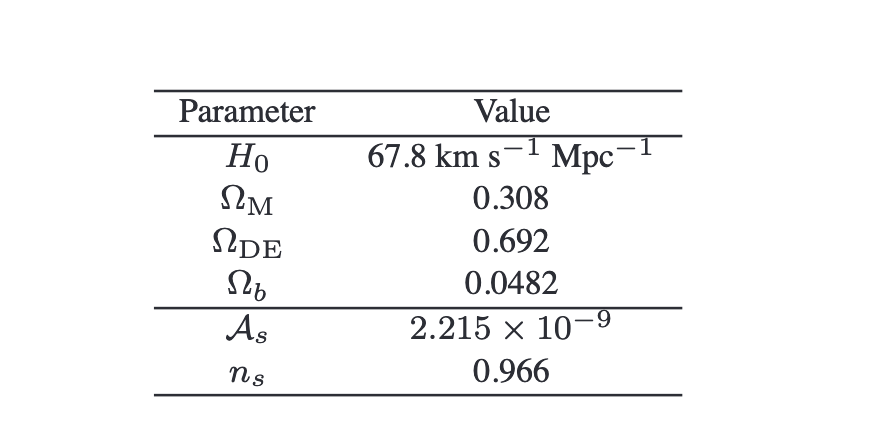
From Baldi, M., & Simpson, F. (2015).

# $z=0$ #

In [2]:
Omega_b = 0.0482
Omega_c = 0.308 - Omega_b
h = 0.678
n_s = 0.966 
A_s = 2.112e-9   #Ben 
#A_s = 2.115e-9   #Baldi, Simpson 
m_nu = 0.0
w11 = -1.1
w09 = -0.9
w_a = 0.0

# Model selection and parameter (1:GR, 2:f(R), 3:DGP, 4:quintessence with interaction, 5:CPL with interaction)
mymodel = "quintessence with interaction"

xi_ds = 10.0*h  # dark scattering interaction term
massloop = 30

# Redshifts
zmin = 0.; zmax = 1.
nz = 10 # Need at least 4 if using massive neutrinos
zs = np.linspace(zmin, zmax, nz)

# Wavenumbers [h/Mpc]
k_max = 20.

p_w11 = camb.CAMBparams(WantTransfer=True, 
                    Want_CMB=False, Want_CMB_lensing=False, DoLensing=False, 
                    NonLinear="NonLinear_none",
                    WantTensors=False, WantVectors=False, WantCls=False, WantDerivedParameters=False,
                    want_zdrag=False, want_zstar=False, DarkEnergyModel="fluid")

p_w09 = camb.CAMBparams(WantTransfer=True, 
                    Want_CMB=False, Want_CMB_lensing=False, DoLensing=False, 
                    NonLinear="NonLinear_none",
                    WantTensors=False, WantVectors=False, WantCls=False, WantDerivedParameters=False,
                    want_zdrag=False, want_zstar=False, DarkEnergyModel="fluid")

p_lcdm = camb.CAMBparams(WantTransfer=True, 
                    Want_CMB=False, Want_CMB_lensing=False, DoLensing=False, 
                    NonLinear="NonLinear_none",
                    WantTensors=False, WantVectors=False, WantCls=False, WantDerivedParameters=False,
                    want_zdrag=False, want_zstar=False, DarkEnergyModel="fluid")

# Compute CAMB results

p_w09.set_cosmology(H0=h*100, ombh2=Omega_b*h**2, omch2=Omega_c*h**2, omk=0, mnu=m_nu)
p_w11.set_cosmology(H0=h*100, ombh2=Omega_b*h**2, omch2=Omega_c*h**2, omk=0, mnu=m_nu)
p_lcdm.set_cosmology(H0=h*100, ombh2=Omega_b*h**2, omch2=Omega_c*h**2, omk=0, mnu=m_nu)


p_w09.set_dark_energy(w=w09, wa=w_a, cs2=1.0)
p_w11.set_dark_energy(w=w11,wa=w_a, cs2=1.0)
p_lcdm.set_dark_energy(w=-1.0,wa=w_a, cs2=1.0)


p_w09.set_initial_power(camb.initialpower.InitialPowerLaw(As=A_s, ns=n_s))
p_w11.set_initial_power(camb.initialpower.InitialPowerLaw(As=A_s, ns=n_s))
p_lcdm.set_initial_power(camb.initialpower.InitialPowerLaw(As=A_s, ns=n_s))


p_w09.set_matter_power(redshifts=zs[::-1], kmax=k_max, nonlinear=False)
p_w11.set_matter_power(redshifts=zs[::-1], kmax=k_max, nonlinear=False)
p_lcdm.set_matter_power(redshifts=zs[::-1], kmax=k_max, nonlinear=False)



r_w09 = camb.get_results(p_w09)
r_w11 = camb.get_results(p_w11)
r_lcdm = camb.get_results(p_lcdm)


sigma_8_w09 = r_w09.get_sigma8()[-1]
sigma_8_w11 = r_w11.get_sigma8()[-1]
sigma_8_lcdm = r_lcdm.get_sigma8()[-1]


#p_w09.set_matter_power(redshifts=zs, kmax=k_max, nonlinear=True)
#p_w11.set_matter_power(redshifts=zs, kmax=k_max, nonlinear=True)
#p_lcdm.set_matter_power(redshifts=zs, kmax=k_max, nonlinear=True)

#k_lin, z_lin, pofk_lin_camb_w09 = r_w09.get_linear_matter_power_spectrum(minkh=0.0001, maxkh=100.0, npoints=500 )
#k_lin, z_lin, pofk_lin_camb_w11 = r_w11.get_linear_matter_power_spectrum(minkh=0.0001, maxkh=100.0, npoints=500)
#k_lin, z_lin, pofk_lin_camb_lcdm = r_lcdm.get_linear_matter_power_spectrum(minkh=0.0001, maxkh=100.0, npoints=500)


k_lin, z_lin, pofk_lin_camb_w09 = r_w09.get_linear_matter_power_spectrum(nonlinear=False)
k_lin, z_lin, pofk_lin_camb_w11 = r_w11.get_linear_matter_power_spectrum(nonlinear=False)
k_lin, z_lin, pofk_lin_camb_lcdm = r_lcdm.get_linear_matter_power_spectrum(nonlinear=False)


Omega_v_lcdm = r_lcdm.omega_de + r_lcdm.get_Omega("photon") + r_lcdm.get_Omega("neutrino")
Omega_v_w11 = r_w11.omega_de + r_w11.get_Omega("photon") + r_w11.get_Omega("neutrino")
Omega_v_w09 = r_w09.omega_de + r_w09.get_Omega("photon") + r_w09.get_Omega("neutrino")

Omega_m = p_lcdm.omegam

In [3]:
print("For LCDM, sigma_8 value is:", sigma_8_lcdm)
print("For w=-1.1, sigma_8 value is:", sigma_8_w11)
print("For w=-0.9, sigma_8 value is:", sigma_8_w09)

For LCDM, sigma_8 value is: 0.8255690792544778
For w=-1.1, sigma_8 value is: 0.8447984949756785
For w=-0.9, sigma_8 value is: 0.8025594236997698


!
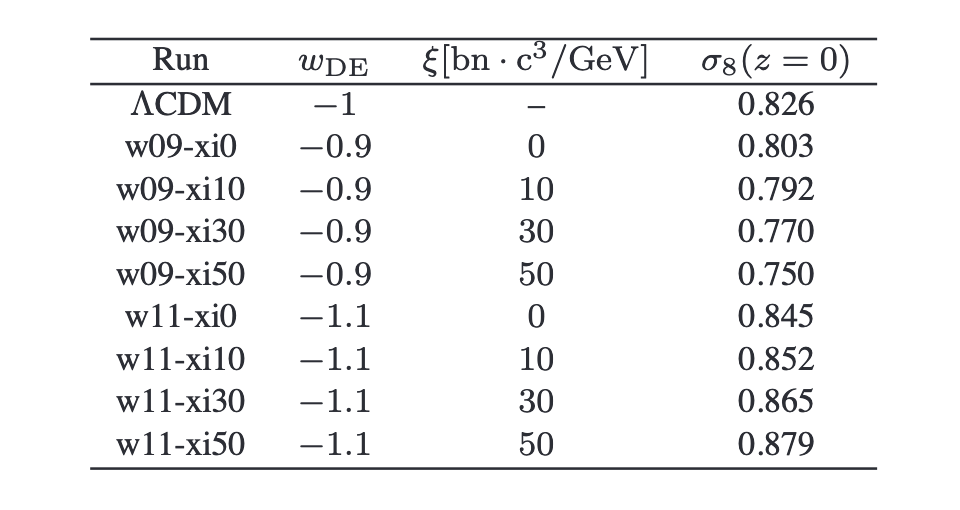
From Baldi, M., & Simpson, F. (2015).

# ReACT

In [4]:
react = pyreact.ReACT()

# Only compute the reaction up to z=2.5
z_lin = np.array(z_lin)
z_react = z_lin[z_lin < 2.5]


R_w09, pofk_lin_react_w09, sigma_8_w09_2 = react.compute_reaction(
                                h, n_s, Omega_m, Omega_b, sigma_8_w09, z_react, k_lin, pofk_lin_camb_w09[0], model=mymodel, 
                                fR0=0.0, Omega_rc=0.0, w=w09, wa=w_a, xi = xi_ds, 
                                is_transfer=False, mass_loop=massloop,
                                verbose=True)  


R_w11, pofk_lin_react_w11, sigma_8_w11_2 = react.compute_reaction(
                                h, n_s, Omega_m, Omega_b, sigma_8_w11, z_react, k_lin, pofk_lin_camb_w11[0], model=mymodel, 
                                fR0=0.0, Omega_rc=0.0, w=w11, wa=w_a, xi = xi_ds, 
                                is_transfer=False, mass_loop=massloop,
                                verbose=True)  


R_lcdm, pofk_lin_react_lcdm, sigma_8_lcdm_2 = react.compute_reaction(
                                h, n_s, Omega_m, Omega_b, sigma_8_lcdm, z_react, k_lin, pofk_lin_camb_lcdm[0], model=mymodel, 
                                fR0=0.0, Omega_rc=0.0, w=-1.0, wa=0.0, xi = 0.0, 
                                is_transfer=False, mass_loop=massloop,
                                verbose=True)  


In [5]:
z_react

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [6]:
sigma_8_lcdm, sigma_8_lcdm_2 

(0.8255690792544778, 0.0)

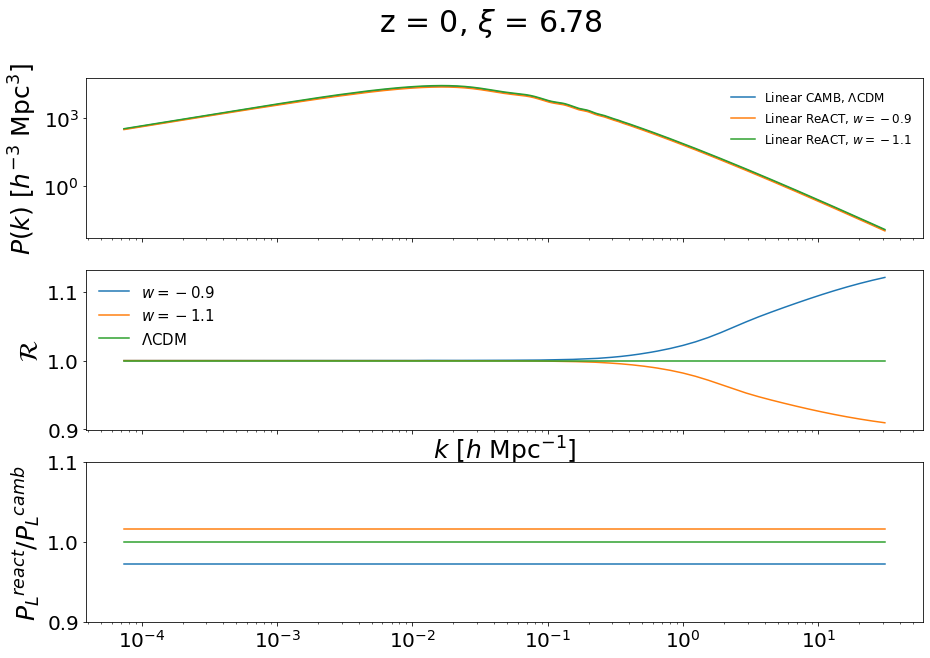

In [9]:
figure, ax = plt.subplots(3,1, figsize = (15,10),  sharex=True, sharey = False)

#plt.plot(k, P_ide, '-',  color='blue', label = '$\omega_{DE} = -0.9$')
#plt.plot(k, P_lcdm, '-',  color='red', label = '$\omega_{DE} = -1$')
figure.suptitle(f"z = 0, $\\xi$ = {xi_ds}", fontsize = 30)

figure.subplots_adjust(hspace=0.2)

ax[0].loglog(k_lin, pofk_lin_camb_lcdm[0], label="Linear CAMB, $\Lambda$CDM")

ax[0].loglog(k_lin, pofk_lin_react_w09[0], label="Linear ReACT, $w=-0.9$")
ax[0].loglog(k_lin, pofk_lin_react_w11[0], label="Linear ReACT, $w=-1.1$")


ax[1].semilogx(k_lin, R_w09[0], label="$w=-0.9$")
ax[1].semilogx(k_lin, R_w11[0], label="$w=-1.1$")
ax[1].semilogx(k_lin, R_lcdm[0], label = "$\Lambda$CDM")


ax[2].semilogx(k_lin, pofk_lin_react_w09[0]/pofk_lin_camb_w09[0], label="$w=-0.9$")
ax[2].semilogx(k_lin, pofk_lin_react_w11[0]/pofk_lin_camb_w11[0], label="$w=-1.1$")
ax[2].semilogx(k_lin, pofk_lin_react_lcdm[0]/pofk_lin_camb_lcdm[0], label = "$\Lambda$CDM")


ax[0].legend(frameon=False)

ax[0].set_ylabel("$P(k)$ [$h^{-3}$ Mpc$^3$]",fontsize=25)
ax[1].set_ylabel("$\mathcal{R}$",fontsize=25)
ax[2].set_ylabel("$P_L{^{react}}/P_L{^{camb}}$",fontsize=25)

ax[1].set_xlabel("$k$ [$h$ Mpc$^{-1}$]",fontsize=25)


ax[0].legend(loc='upper right', frameon=False, fontsize = 12)
ax[1].legend(loc='upper left', frameon=False, fontsize = 15)

ax[2].set_ylim(0.9,1.1)


ax[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 20)


plt.show()

# Halo model from HMCode and $P_{\rm NL}$

In [10]:
import pyhmcode as hmcode

In [11]:
# Setup HMcode internal cosmology
c_lcdm = hmcode.Cosmology()
c_w09 = hmcode.Cosmology()
c_w11 = hmcode.Cosmology()

# Set HMcode internal cosmological parameters
c_lcdm.om_m = Omega_m
c_lcdm.om_b = Omega_b
c_lcdm.om_v = Omega_v_lcdm
c_lcdm.h = h
c_lcdm.ns = n_s
c_lcdm.sig8 = sigma_8_lcdm
c_lcdm.m_nu = m_nu

# Set HMcode internal cosmological parameters
c_w09.om_m = Omega_m
c_w09.om_b = Omega_b
c_w09.om_v = Omega_v_w09
c_w09.h = h
c_w09.ns = n_s
c_w09.sig8 = sigma_8_w09
c_w09.m_nu = m_nu

# Set HMcode internal cosmological parameters
c_w11.om_m = Omega_m
c_w11.om_b = Omega_b
c_w11.om_v = Omega_v_w11
c_w11.h = h
c_w11.ns = n_s
c_w11.sig8 = sigma_8_w11
c_w11.m_nu = m_nu



# Set the linear power spectrum for HMcode
c_lcdm.set_linear_power_spectrum(k_lin, z_react, pofk_lin_camb_lcdm)
c_w09.set_linear_power_spectrum(k_lin, z_react, pofk_lin_react_w09)
c_w11.set_linear_power_spectrum(k_lin, z_react, pofk_lin_react_w11)

# Set the halo model in HMcode
# Options: HMcode2015, HMcode2016, HMcode2020
hmod = hmcode.Halomodel(hmcode.HMcode2016, verbose=False)

# Power spectrum calculation
Pk_hm_lcdm = hmcode.calculate_nonlinear_power_spectrum(c_lcdm, hmod, verbose=False)
Pk_hm_w09 = hmcode.calculate_nonlinear_power_spectrum(c_w09, hmod, verbose=False)
Pk_hm_w11 = hmcode.calculate_nonlinear_power_spectrum(c_w11, hmod, verbose=False)

In [12]:
z_react[-1]

1.0

# z = 0

In [13]:
P_NL_w09_z0 = Pk_hm_w09[0]*R_w09[0]
P_NL_w11_z0 = Pk_hm_w11[0]*R_w11[0]
P_NL_lcdm_z0 = Pk_hm_lcdm[0]*R_lcdm[0]

In [14]:
ratio_w11_z0 = P_NL_w11_z0/P_NL_lcdm_z0
ratio_w09_z0 = P_NL_w09_z0/P_NL_lcdm_z0

# z = 1

In [15]:
P_NL_w09_z1 = Pk_hm_w09[-1]*R_w09[-1]
P_NL_w11_z1 = Pk_hm_w11[-1]*R_w11[-1]
P_NL_lcdm_z1 = Pk_hm_lcdm[-1]*R_lcdm[-1]

In [16]:
ratio_w09_z1 = P_NL_w09_z1/P_NL_lcdm_z1
ratio_w11_z1 = P_NL_w11_z1/P_NL_lcdm_z1

# Data from simulation

In [17]:
# z = 0
k_data, P_lcdm_data, none = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/lcdm_z0.dat', unpack=True) 
k_data09, P_w09_data, none09 = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/w09_z0.dat', unpack=True) 
k_data11, P_w11_data, none11 = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/w11_z0.dat', unpack=True) 

In [18]:
# z = 1
k1_data, Pz1_lcdm_data, none1 = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/lcdm_z1.dat', unpack=True) 
k1_data09, Pz1_w09_data, none1_09 = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/w09_z1.dat', unpack=True) 
k1_data11, Pz1_w11_data, none1_11 = np.loadtxt('/Users/osx/Documents/ReACT-react_with_interact/notebooks/data/nbody/w11_z1.dat', unpack=True) 

In [19]:
ratio_w09_z0_data = P_w09_data/P_lcdm_data
ratio_w09_z1_data = Pz1_w09_data/Pz1_lcdm_data

ratio_w11_z0_data = P_w11_data/P_lcdm_data
ratio_w11_z1_data = Pz1_w11_data/Pz1_lcdm_data

len(k_data), max(k_data), max(k1_data)

(21, 12.8651, 6.2412)

# The next lines just identify the k-scales of ReACT according to k-scales from simulations in order to compare them and compute $\Delta P_{NL}$

In [20]:
# z = 0 
k_residual = []
for ii in range(len(k_data)): 
    #print (ii)
    k_residual.append(k_lin[k_data[ii] <= k_lin][0])
        
len(k_residual)

21

In [21]:
# z = 1
k1_residual = []
for ii in range(len(k1_data)):  
    k1_residual.append(k_lin[k1_data[ii] <= k_lin][0])

In [22]:
ratio_new_w09_z0 = []
ratio_new_w11_z0 = []
for jj in range(len(k_residual)):
    kk = (np.where(k_lin == k_residual[jj])[0][0])
    ratio_new_w09_z0.append(ratio_w09_z0[kk])
    ratio_new_w11_z0.append(ratio_w11_z0[kk])
    
len(ratio_new_w09_z0)

21

In [23]:
residual_w09_z0 = ratio_new_w09_z0/ratio_w09_z0_data
residual_w11_z0 = ratio_new_w11_z0/ratio_w11_z0_data

In [24]:
# z = 1 
kz1_residual = []
for ii in range(len(k1_data)):  
    kz1_residual.append(k_lin[k1_data[ii] <= k_lin][0])

len(kz1_residual)

19

In [25]:
# z = 1
ratio_new_w09_z1 = []
ratio_new_w11_z1 = []
for jj in range(len(kz1_residual)):
    kk = (np.where(k_lin == kz1_residual[jj])[0][0])
    ratio_new_w09_z1.append(ratio_w09_z1[kk])
    ratio_new_w11_z1.append(ratio_w11_z1[kk])

len(ratio_new_w09_z1)

19

In [26]:
residual_w09_z1 = ratio_new_w09_z1/ratio_w09_z1_data
residual_w11_z1 = ratio_new_w11_z1/ratio_w11_z1_data

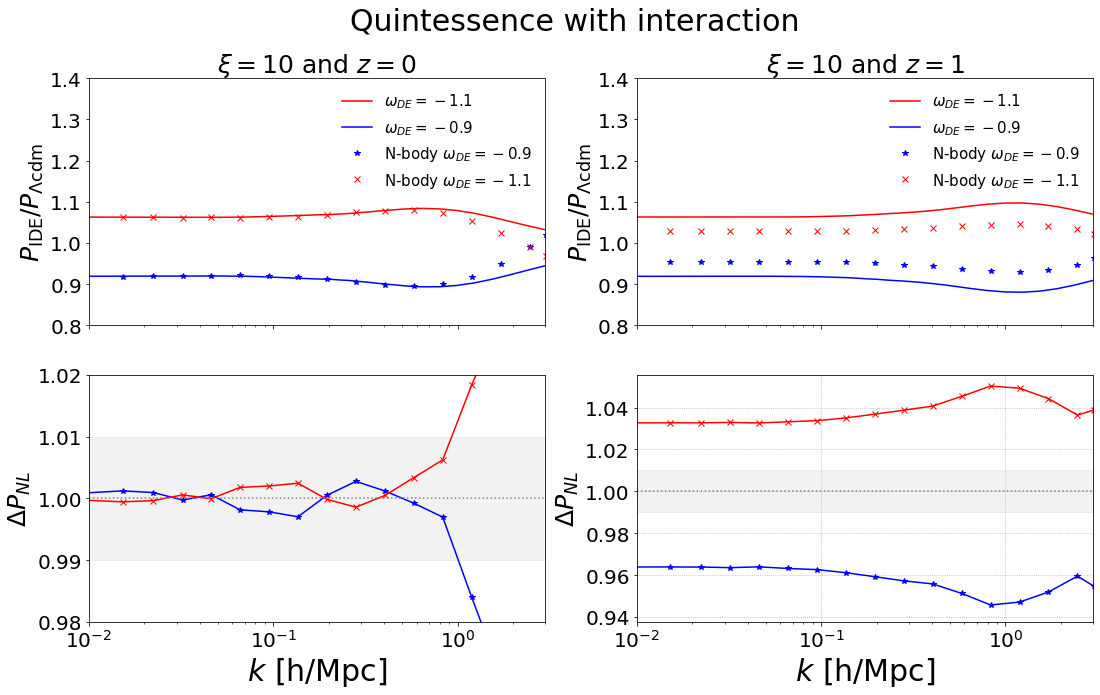

In [27]:
figure, ax = plt.subplots(2,2, figsize = (18,10),  sharex=True, sharey = False)

#plt.plot(k, P_ide, '-',  color='blue', label = '$\omega_{DE} = -0.9$')
#plt.plot(k, P_lcdm, '-',  color='red', label = '$\omega_{DE} = -1$')
figure.suptitle('Quintessence with interaction', fontsize = 30)

ax[0,0].plot(k_lin, ratio_w11_z0, '-',  color='red', label = '$\omega_{DE} = -1.1$')
ax[0,0].plot(k_lin, ratio_w09_z0, '-',  color='blue', label = '$\omega_{DE} = -0.9$')
ax[0,0].plot(k_data09, ratio_w09_z0_data, '*',  color='blue', label = 'N-body $\omega_{DE} = -0.9$')
ax[0,0].plot(k_data11, ratio_w11_z0_data, 'x',  color='red', label = 'N-body $\omega_{DE} = -1.1$')

#ax[0,0].plot(k_ben, ratio10_w11_z0_ben, '.-',  color='purple', label = 'Ben $\omega_{DE} = -1.1$')
#ax[0,0].plot(k_ben, ratio10_w09_z0_ben, '.-',  color='orange', label = 'Ben $\omega_{DE} = -0.9$')



ax[0,1].plot(k_lin, ratio_w11_z1, '-',  color='red', label = '$\omega_{DE} = -1.1$')
ax[0,1].plot(k_lin, ratio_w09_z1, '-',  color='blue', label = '$\omega_{DE} = -0.9$')
ax[0,1].plot(k1_data09, ratio_w09_z1_data, '*',  color='blue', label = 'N-body $\omega_{DE} = -0.9$')
ax[0,1].plot(k1_data11, ratio_w11_z1_data, 'x',  color='red', label = 'N-body $\omega_{DE} = -1.1$')


ax[1,0].plot(k_data09, residual_w09_z0, '-*',  color='blue')
ax[1,0].plot(k_data11, residual_w11_z0, '-x',  color='red')

ax[1,1].plot(k1_data09, residual_w09_z1, '-*',  color='blue')
ax[1,1].plot(k1_data11, residual_w11_z1, '-x',  color='red')






ax[0, 0].set_title(r'$\xi = 10$ and $z=0$',  fontsize = 25)
ax[0, 1].set_title(r'$\xi = 10$ and $z=1$',  fontsize = 25)

ax[1,0].set_xlabel(r'$k \ \rm [h/Mpc]$',fontsize=30)
ax[1,1].set_xlabel(r'$k \ \rm [h/Mpc]$',fontsize=30)

ax[0,0].set_ylabel(r'$P_{\rm IDE}/P_{\Lambda \rm cdm}$',fontsize=25)
ax[0,1].set_ylabel(r'$P_{\rm IDE}/P_{\Lambda \rm cdm}$',fontsize=25)

ax[1,0].set_ylabel(r'$\Delta P_{NL}$',fontsize=25)
ax[1,1].set_ylabel(r'$\Delta P_{NL}$',fontsize=25)


#plt.yscale('log')

#plt.legend(loc='upper right', frameon=False, fontsize = 25)

ax[0,0].legend(loc='upper right', frameon=False, fontsize = 15)
ax[0,1].legend(loc='upper right', frameon=False, fontsize = 15)

ax[0,0].set_xlim(0.01, 3)
ax[0,0].set_ylim(0.8,1.4)
ax[0,1].set_ylim(0.8,1.4)

ax[1,0].set_ylim(0.98,1.02)
#ax[1,1].set_ylim(0.98,1.02)



ax[0,0].set_xscale('log')
ax[0,0].set_xscale('log')


ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 20)

ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 20)


ax[1,0].axhline(y=1.0, ls= 'dotted', color='grey')
ax[1,1].axhline(y=1.0, ls= 'dotted', color='grey')

ax[1,1].fill_between(k_lin, 1.0 + (1.0/100.0),  1.0 - (1.0/100.0), color='grey', alpha=0.1)
ax[1,0].fill_between(k_lin, 0.99,  1.01, color='grey', alpha=0.1)

plt.subplots_adjust(hspace=0.2)


plt.grid('on', ls = 'dotted')
#plt.savefig('IDE_ratio_lcdm_pyreact.pdf')
plt.show()

# Baryons implementation
## Since the case of z=1 is not working... I just used z=0

# HMCode 2020

In [31]:
hmod_feedback = hmcode.Halomodel(hmcode.HMcode2020_feedback, verbose=False)
    
logTAGN = 7.8

c_w11.theat = 10**logTAGN
c_w09.theat = 10**logTAGN

# Power spectrum calculation
Pk_feedback_w11 = hmcode.calculate_nonlinear_power_spectrum(c_w11, hmod_feedback, verbose=True)
Pk_feedback_w09 = hmcode.calculate_nonlinear_power_spectrum(c_w09, hmod_feedback, verbose=True)

No handles with labels found to put in legend.


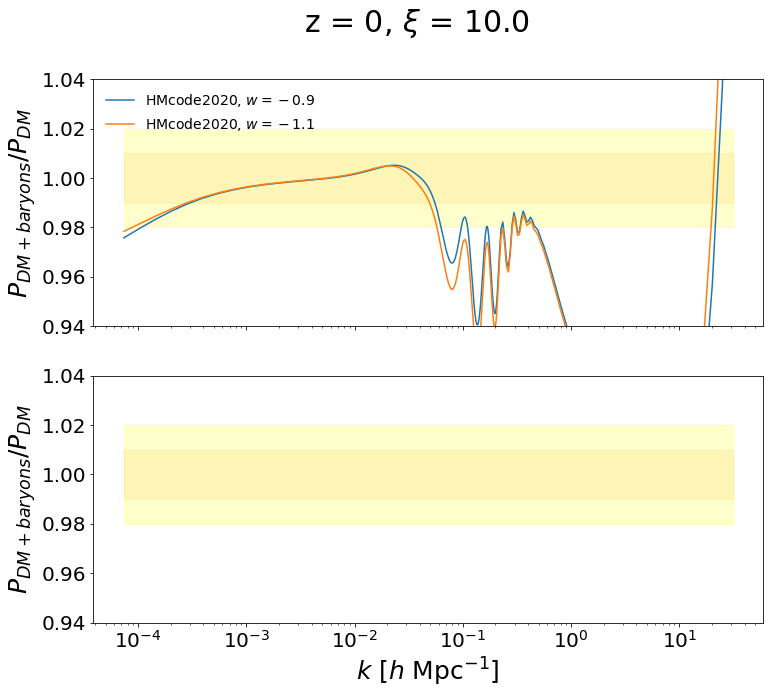

In [33]:
figure, ax = plt.subplots(2,1, figsize = (12,10),  sharex=True, sharey = False)

#plt.plot(k, P_ide, '-',  color='blue', label = '$\omega_{DE} = -0.9$')
#plt.plot(k, P_lcdm, '-',  color='red', label = '$\omega_{DE} = -1$')

figure.suptitle(f"z = 0, $\\xi$ = {xi_ds/h}", fontsize = 30)

ax[0].semilogx( k_lin, Pk_feedback_w09[0]/Pk_hm_w09[0] , label="HMcode2020, $w=-0.9$")
ax[0].semilogx( k_lin, Pk_feedback_w11[0]/Pk_hm_w11[0] , label="HMcode2020, $w=-1.1$")

#ax[1].semilogx( k_lin, Pk_BCMfeedback_w09_z0 , label="BCMemu, $w=-0.9$")
#ax[1].semilogx( k_lin, Pk_BCMfeedback_w11_z0, label="BCMemu, $w=-1.1$")



ax[0].legend(frameon=False)

ax[0].set_ylabel("$P_{DM + baryons} /P_{DM}$",fontsize=25)
ax[1].set_ylabel("$P_{DM + baryons} /P_{DM}$",fontsize=25)

ax[1].set_xlabel("$k$ [$h$ Mpc$^{-1}$]",fontsize=25)


ax[0].legend(loc='upper left', frameon=False, fontsize = 14)
ax[1].legend(loc='upper left', frameon=False, fontsize = 14)

ax[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 20)

ax[0].set_ylim(0.94,1.04)
ax[1].set_ylim(0.94,1.04)

ax[0].fill_between(k_lin, 0.98,  1.02, color='yellow', alpha=0.2)
ax[0].fill_between(k_lin, 1.0 + (1.0/100.0),  1.0 - (1.0/100.0), color='orange', alpha=0.1)
ax[1].fill_between(k_lin, 0.98,  1.02, color='yellow', alpha=0.2)
ax[1].fill_between(k_lin, 1.0 + (1.0/100.0),  1.0 - (1.0/100.0), color='orange', alpha=0.1)


plt.show()

# BCMemu
## Currently I am cheking papers and folders of this emulator. Since this emulator considers more contributions of baryons than HMcode2020_feedback

In [30]:
#import BCMemu

In [ ]:
#bfcemu = BCMemu.BCM_7param(Ob=Omega_b, Om=Omega_m)
#bcmdict_w09 = {'log10Mc': 13.32,
#           'mu'     : 0.93,
#           'thej'   : 4.235,  
#           'gamma'  : 2.25,
#           'delta'  : 6.40,
#           'eta'    : 0.15,
#           'deta'   : 0.14,
#           }

#bcmdict_w11 = {'log10Mc': 13.32,
#           'mu'     : 0.93,
#           'thej'   : 4.235,  
#           'gamma'  : 2.25,
#           'delta'  : 6.40,
#           'eta'    : 0.15,
#           'deta'   : 0.14,
#           }


#Pk_BCMfeedback_w09_z0 = bfcemu.get_boost(z_react[0], bcmdict_w09, k_lin)
#Pk_BCMfeedback_w11_z0 = bfcemu.get_boost(z_react[0], bcmdict_w11, k_lin)